<a href="https://colab.research.google.com/github/StudentsAntoniPartyka/ML/blob/main/homework11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zadanie domowe – dekonwolucja 2D

W tej sekcji wykonamy **ręczną dekonwolucję (conv transpose)** na podstawie podanych parametrów: wejście 3×3, stride=2, padding=1 oraz kernel 3×3.


## 1. Parametry
- Wejście $X$ (3×3):
```
[[5, 1, 3],
 [2, 4, 0],
 [7, 6, 8]]
```
- Kernel $K$ (3×3):
```
[[ 1,  0, -1],
 [ 2,  1,  0],
 [ 0, -1,  1]]
```
- Stride = 2  
- Padding = 1


## 2. Rozszerzenie (insert zeros) – Upsampling
Wstawiamy w nowe macierzy zera między oryginalne elementy co `stride-1`:


In [1]:
import numpy as np

X = np.array([[5, 1, 3],
              [2, 4, 0],
              [7, 6, 8]])
s = 2  # stride
# Nowy rozmiar po wstawieniu zer: (3-1)*2+1 = 5
new_h = (X.shape[0] - 1) * s + 1
new_w = (X.shape[1] - 1) * s + 1
expanded = np.zeros((new_h, new_w), dtype=int)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        expanded[i * s, j * s] = X[i, j]

print("Upsampled (wstawione zera):")
print(expanded)


Upsampled (wstawione zera):
[[5 0 1 0 3]
 [0 0 0 0 0]
 [2 0 4 0 0]
 [0 0 0 0 0]
 [7 0 6 0 8]]


## 3. Padding rozszerzonego wejścia
Dodajemy padding=1 wokół rozszerzonej macierzy, aby finalny wynik miał oczekiwany kształt:


In [2]:
p = 1
padded_expanded = np.pad(expanded, pad_width=p, mode='constant', constant_values=0)
print("Po paddingu (rozmiar 7×7):")
print(padded_expanded)


Po paddingu (rozmiar 7×7):
[[0 0 0 0 0 0 0]
 [0 5 0 1 0 3 0]
 [0 0 0 0 0 0 0]
 [0 2 0 4 0 0 0]
 [0 0 0 0 0 0 0]
 [0 7 0 6 0 8 0]
 [0 0 0 0 0 0 0]]


## 4. Dekonwolucja = konwolucja na rozszerzonym wejściu
Teraz filtrujemy (cross-correlation) z użyciem kernela, stride=1.
Rozmiar wyjścia: (7-3)/1 + 1 = 5 → macierz 5×5.


In [3]:
K = np.array([[ 1,  0, -1],
              [ 2,  1,  0],
              [ 0, -1,  1]])
out_h = padded_expanded.shape[0] - K.shape[0] + 1
out_w = padded_expanded.shape[1] - K.shape[1] + 1
output = np.zeros((out_h, out_w), dtype=int)
for i in range(out_h):
    for j in range(out_w):
        patch = padded_expanded[i:i+K.shape[0], j:j+K.shape[1]]
        output[i, j] = np.sum(patch * K)
print("Wynik dekonwolucji (5×5):")
print(output)


Wynik dekonwolucji (5×5):
[[ 5 10  1  2  3]
 [-2  8 -4 -2  0]
 [ 2  4  4  8  0]
 [-7  4 -6 12 -8]
 [ 7 14  6 12  8]]


## 5. Wynik
Otrzymana macierz (5×5) to finalny wynik dekonwolucji:

```
[[ 5 10  1  2  3]
 [-2  8 -4 -2  0]
 [ 2  4  4  8  0]
 [-7  4 -6 12 -8]
 [ 7 14  6 12  8]]
```


## 1 Co to jest transposed convolution?
Transposed convolution to operacja używana tam, gdzie musimy odzyskać lub stworzyć większy obraz/ mapę cech z mniejszej.

## 2 Czym różni się od zwykłej konwolucji?

Podstawowa konwolucja służy do nauki lokalnych cech przy jednoczesnym ograniczaniu liczby parametrów, natomiast transponowana konwolucja umożliwia odtwarzanie lub powiększanie map cech

## 3. Jak dokładnie odbywa się upsampling?

1. Dla zadanego parametru stride s wstawiamy między każdą parę sąsiednich pikseli oraz między każdy rząd oryginalnych wartości dokładnie s−1 zer.

2. Dokładamy dookoła tej rozszerzonej mapy p rzędów i kolumn zer, aby uzyskać pożądaną kontrolę nad brzegami.

3. Nakładamy filtr
K  na każdy możliwy podobszar rozszerzonej mapy i dla każdej pozycji liczymy sumę iloczynów elementów filtru i odpowiednich wartości mapy


## 4. Znaczenie parametrów

- **Stride (s)**: liczba zer wstawiana między oryginalne wartości. Większe s oznacza silniejszy upsampling.  
- **Padding (p)**: liczba rzędów i kolumn zer dokładanych dookoła. Każda warstwa zer zmniejsza wymiar wyjściowy o dwa razy p.  
- **Kernel size (k)**: rozmiar filtru; większy filtr obejmuje szerszy zasięg sąsiedztwa i dodaje wartość k do końcowego wzoru na rozmiar wyjścia.

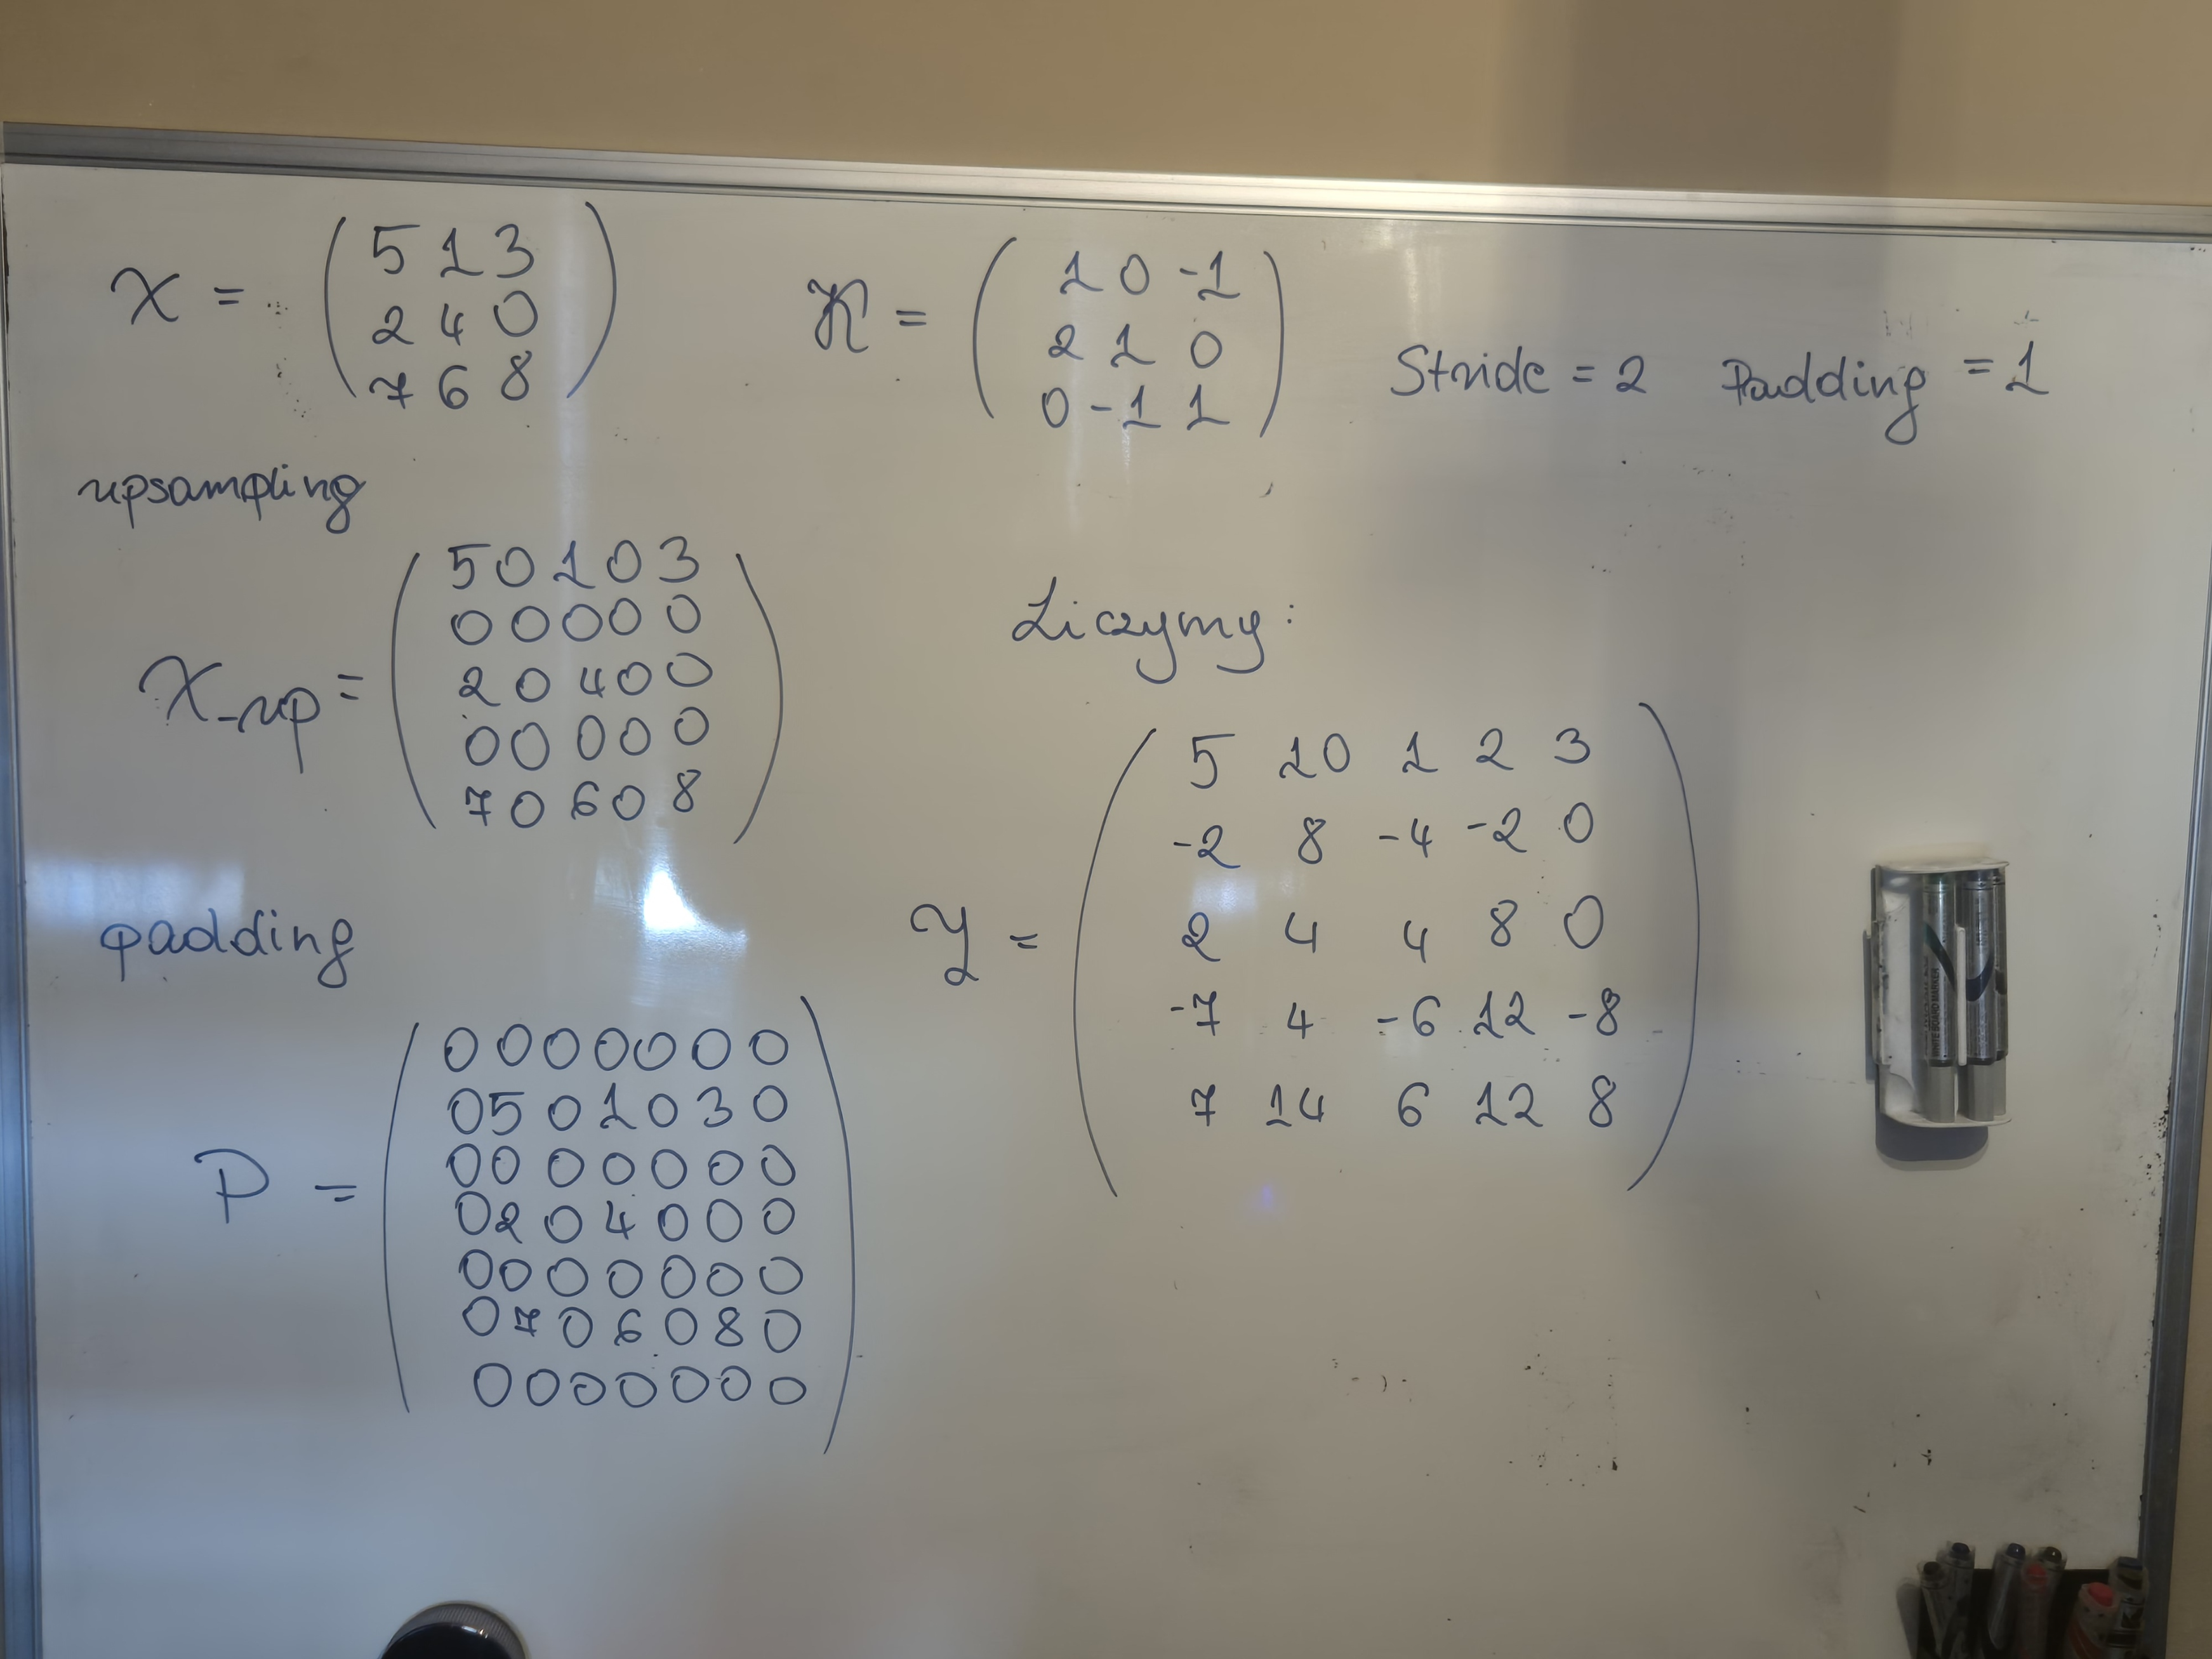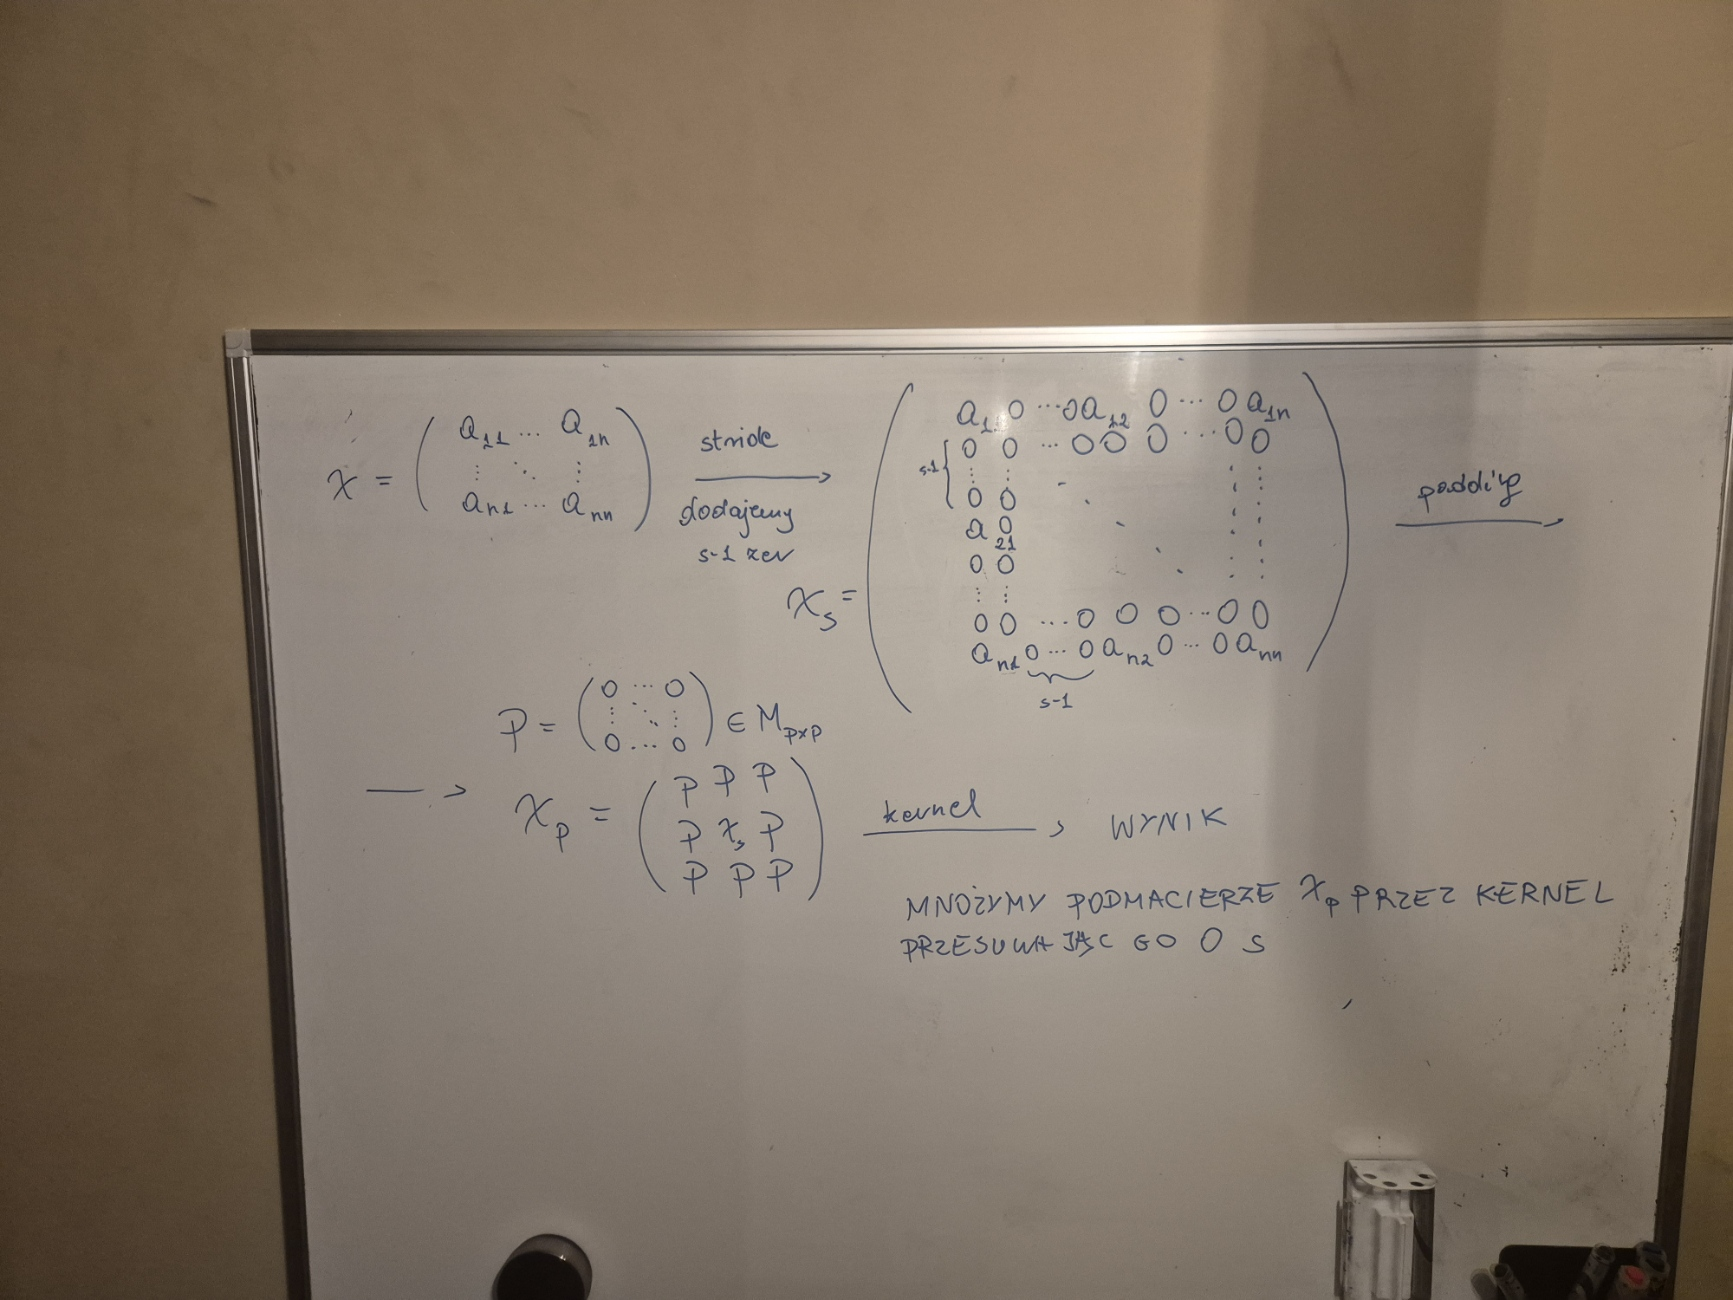